# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
api_key = 'e46a2d5d60e5111e2277f0f52e103c59'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities[:5]

['longyearbyen', 'busselton', 'armacao dos buzios', 'avarua', 'dikson']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cityweather = []
print('Beginning Data Retrieval')
print('-' * 31)

for i, c in enumerate(cities):
    r = requests.get(f'http://api.openweathermap.org/data/2.5/weather?q={c}&appid={api_key}')
    if r.status_code == 200:
        print(f'Processing Record {i:3d} of {len(cities)} | {c.title()}')
        cityweather.append(r.json())
    else:
        print('City not found. Skipping...')
    
print('-' * 31)
print('Data Retrieval Complete')     
print('-' * 31)

Beginning Data Retrieval
-------------------------------
Processing Record  0 of 609 | Longyearbyen
Processing Record  1 of 609 | Busselton
City not found. Skipping...
Processing Record  3 of 609 | Avarua
Processing Record  4 of 609 | Dikson
Processing Record  5 of 609 | Qaanaaq
Processing Record  6 of 609 | Ribeira Grande
Processing Record  7 of 609 | Ushuaia
Processing Record  8 of 609 | Grand Gaube
Processing Record  9 of 609 | Lebu
Processing Record 10 of 609 | Bozeman
Processing Record 11 of 609 | Hilo
Processing Record 12 of 609 | Port-Gentil
Processing Record 13 of 609 | Carnarvon
Processing Record 14 of 609 | Gull Lake
Processing Record 15 of 609 | Kavaratti
Processing Record 16 of 609 | Lompoc
Processing Record 17 of 609 | New Norfolk
Processing Record 18 of 609 | Thompson
Processing Record 19 of 609 | Cape Town
Processing Record 20 of 609 | Saint-Pierre
Processing Record 21 of 609 | Poum
Processing Record 22 of 609 | Calvia
Processing Record 23 of 609 | San Patricio
City not 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [81]:
data = pd.DataFrame(cityweather)
data['main'][0]

{'temp': 267.15,
 'feels_like': 256.8,
 'temp_min': 267.15,
 'temp_max': 267.15,
 'pressure': 1002,
 'humidity': 67}

In [82]:
all_weather = pd.DataFrame({
    'City': data['name'],
    'Cloudiness': [d['all'] for d in data['clouds']],
    'Country': [s['country'] for s in data['sys']],
    'Date': data['dt'],
    'Humidity': [m['humidity'] for m in data['main']],
    'Lat': [c['lat'] for c in data['coord']],
    'Lng': [c['lon'] for c in data['coord']],
    'Max Temp': [m['temp_max'] for m in data['main']],
    'Wind Speed': [m['speed'] for m in data['wind']],
})
all_weather.to_csv('data/openweather.csv')
all_weather.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [83]:
all_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Longyearbyen,20,NO,1576301285,67,78.22,15.63,267.15,10.30
1,Busselton,14,AU,1576301285,5,-33.64,115.35,312.59,4.63
2,Avarua,100,CK,1576301267,73,-21.21,-159.78,298.15,5.10
3,Dikson,75,RU,1576301268,100,73.51,80.55,250.25,1.70
4,Qaanaaq,5,GL,1576301268,55,77.48,-69.36,249.69,3.09


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

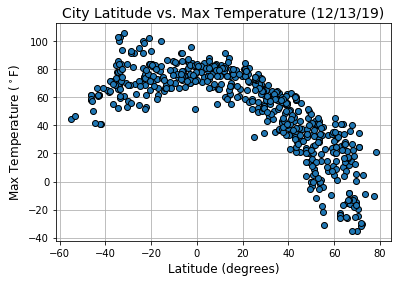

In [94]:
plt.plot(
    all_weather['Lat'],
    (all_weather['Max Temp'] - 273.15) * (9/5) + 32,
    'o', markeredgecolor='k'
)
plt.title('City Latitude vs. Max Temperature (12/13/19)', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel(r'Max Temperature ($^\circ$F)', size=12)
plt.grid()

#### Latitude vs. Humidity Plot

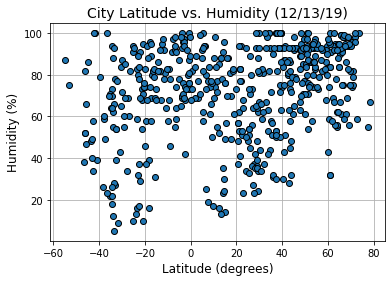

In [96]:
plt.plot(
    all_weather['Lat'],
    all_weather['Humidity'],
    'o', markeredgecolor='k'
)
plt.title('City Latitude vs. Humidity (12/13/19)', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel('Humidity (%)', size=12)
plt.grid()

#### Latitude vs. Cloudiness Plot

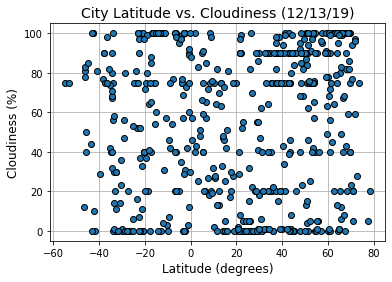

In [97]:
plt.plot(
    all_weather['Lat'],
    all_weather['Cloudiness'],
    'o', markeredgecolor='k'
)
plt.title('City Latitude vs. Cloudiness (12/13/19)', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel('Cloudiness (%)', size=12)
plt.grid()

#### Latitude vs. Wind Speed Plot

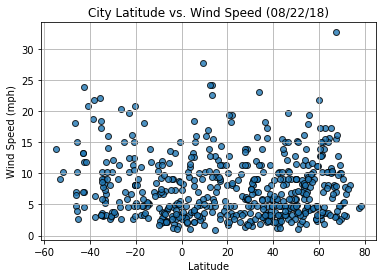

In [9]:
plt.plot(
    all_weather['Lat'],
    all_weather['Wind Speed'],
    'o', markeredgecolor='k'
)
plt.title('City Latitude vs. Wind (12/13/19)', size=14)
plt.xlabel('Latitude (degrees)', size=12)
plt.ylabel(r'Humidity (%)', size=12)
plt.grid()